Dataset shape: (500, 8)
   Attendance  StudyHours  AssignmentsCompleted  PreviousGrade  Gender  \
0          90           1                     3             87  Female   
1          58           6                     4             83    Male   
2          52           1                     4             53    Male   
3          85           2                     9             54  Female   
4          50           2                     9             61  Female   

  ParentEducation InternetAccess  Pass  
0      HighSchool            Yes     0  
1    PostGraduate             No     0  
2    PostGraduate            Yes     0  
3    PostGraduate             No     0  
4      HighSchool            Yes     0  

========== Accuracy ==========
Decision Tree: 0.87
Logistic Regression: 0.97

========== Classification Report (Decision Tree) ==========

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        66
           1       0.86      0.74   

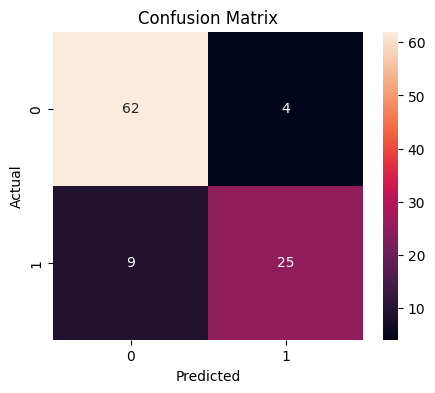

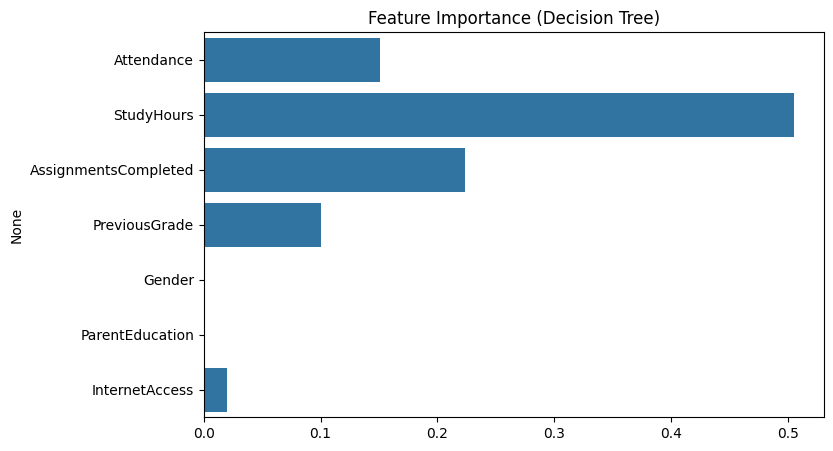

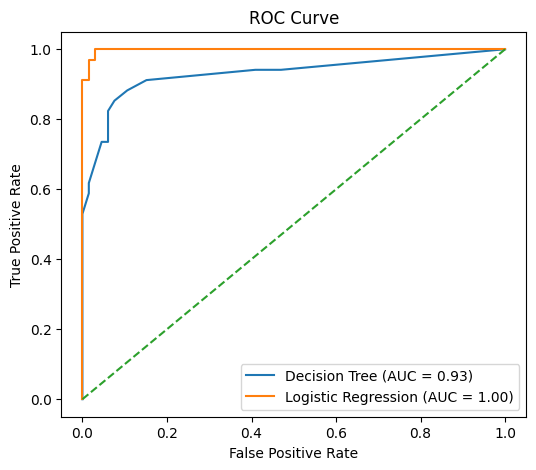


========== AUC Scores ==========
Decision Tree AUC: 0.9302584670231728
Logistic Regression AUC: 0.9982174688057042


In [10]:
# =============================================
# STUDENT PERFORMANCE PREDICTIVE MODEL (COMPLETE)
# =============================================

# -------------------------
# 1. Import Libraries
# -------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# -------------------------
# 2. Load Dataset
# -------------------------
df = pd.read_excel("students.xlsx")   # change to .csv if needed

print("Dataset shape:", df.shape)
print(df.head())

# -------------------------
# 3. Handle Missing Values
# -------------------------
df.fillna(df.mean(numeric_only=True), inplace=True)

# -------------------------
# 4. Encode Categorical Data
# -------------------------
le = LabelEncoder()

for col in df.select_dtypes(include=['object']):
    df[col] = le.fit_transform(df[col])

# -------------------------
# 5. Define Features & Target
# -------------------------
X = df.drop("Pass", axis=1)
y = df["Pass"]

# -------------------------
# 6. Train-Test Split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 7A. Decision Tree Model
# -------------------------
dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# -------------------------
# 7B. Logistic Regression Model
# -------------------------
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# -------------------------
# 8. Accuracy Comparison
# -------------------------
dt_acc = accuracy_score(y_test, dt_pred)
lr_acc = accuracy_score(y_test, lr_pred)

print("\n========== Accuracy ==========")
print("Decision Tree:", dt_acc)
print("Logistic Regression:", lr_acc)

# -------------------------
# 9. Classification Report
# -------------------------
print("\n========== Classification Report (Decision Tree) ==========\n")
print(classification_report(y_test, dt_pred))

# -------------------------
# 10. Confusion Matrix
# -------------------------
cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------
# 11. Feature Importance
# -------------------------
importance = dt_model.feature_importances_

plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance (Decision Tree)")
plt.show()

# -------------------------
# 12. ROC Curve + AUC
# -------------------------
dt_probs = dt_model.predict_proba(X_test)[:, 1]
lr_probs = lr_model.predict_proba(X_test)[:, 1]

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

dt_auc = auc(dt_fpr, dt_tpr)
lr_auc = auc(lr_fpr, lr_tpr)

plt.figure(figsize=(6,5))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.2f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})")
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("\n========== AUC Scores ==========")
print("Decision Tree AUC:", dt_auc)
print("Logistic Regression AUC:", lr_auc)
